### How do the musical attributes of tracks change when artists collaborate compared to when they work solo? For example, do collaborations typically result in higher danceability or energy levels?

In [532]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy
from scipy.stats import chi2_contingency
import statsmodels.formula.api as smf
import statsmodels.api as sm

# %matplotlib inline
# plt.style.use('ggplot')
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()

**Loading the dataset:** 
We first load the dataset and explore it's data (i.e., columns, shape, attributes N/A values etc...) to get a better understanding before cleaning the data.

In [533]:
df = pd.read_csv('../dataset.csv')

In [534]:
df.shape

(114000, 21)

In [535]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

We see some unfamilar column values which we need to further explore such as "key" and "mode" so we will print the unique values to get a better understand of its data. 

In [536]:
print(df['key'].unique())
print(df['mode'].unique())

[ 1  0  2  6 11  8  4  7  3 10  5  9]
[0 1]


We see that the key values range from 0-11 but we still do not know what it represents. So we resort to searching the web. We find a GitHub repo with all the definitions for each column. We can trust that this is a reputable source as our dataset is from huggingface - where we found the definition for each column.

Source: https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset/commit/8ea780d5df64e9376f2b2df5987051eea84ff548

- **track_id**: The Spotify ID for the track
- **artists**: The artists' names who performed the track. If there is more than one artist, they are separated by a `;`
- **album_name**: The album name in which the track appears
- **track_name**: Name of the track
- **popularity**: **The popularity of a track is a value between 0 and 100, with 100 being the most popular**. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms**: The track length in milliseconds
- **explicit**: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale
- **key**: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. `0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is -1 (higher number = higher pitch)
- **loudness**: The overall loudness of a track in decibels (dB)
- **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness**: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature**: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of `3/4`, to `7/4`.
- **track_genre**: The genre in which the track belongs

We see that - popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, and track_genre are all attributes we should looking into.

In [537]:
df.head(50)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,...,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,...,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,...,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


To further familiarize ourselves with the data, we can view all basic information of the numerical value columns in the dataset. These are all attributes which we should be looking at with the along with "explicit" and "track_genre" which are categorical values.

In [538]:
df.describe() 

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


Next, we look into artists to understand how they are formatted so we can determine if the track was a solo or collaboration.

In [539]:
df['artists'].head(50)

0                              Gen Hoshino
1                             Ben Woodward
2                   Ingrid Michaelson;ZAYN
3                             Kina Grannis
4                         Chord Overstreet
5                             Tyrone Wells
6     A Great Big World;Christina Aguilera
7                               Jason Mraz
8                Jason Mraz;Colbie Caillat
9                           Ross Copperman
10                            Zack Tabudlo
11                              Jason Mraz
12                                Dan Berk
13                           Anna Hamilton
14                Chord Overstreet;Deepend
15                             Landon Pigg
16                    Andrew Foy;Renee Foy
17                    Andrew Foy;Renee Foy
18               Jason Mraz;Colbie Caillat
19                 Boyce Avenue;Bea Miller
20                              Jason Mraz
21              Boyce Avenue;Jennel Garcia
22    A Great Big World;Christina Aguilera
23         

From looking at this list, we can see that the artists are separated by a semi colon. We can verify this by Google-ling "Brandi Carlile" and "Lucius" (for index 47-49) separately which says that one is a American singer-songwriter and the other is a band. Personally, I recognize Andrew and Renee Foy (Index 16 and 17) so the assumption that the artists are separated by semi colons is true.
  

## Whats Next?

We can use this determine if a track is a collaboration if we split the artist by ";" and the length is greater than 1. We can then mark that track as a collaboration or solo.
 
But before that we must clean the data first - that is, rows with NaN values for artists are not analysable so we can drop those rows. We need to ensure we do not have duplicate rows by checking that no 2 columns with the same track_id exists. `track_id`, `track_name` and `album_name` are also irrelevant for this case. We only need `artists` and the attributes columns. We can also drop the `Unnamed: 0` column since is appears to be replicating the index of the dataframe.  

# Outline:
* Data Cleaning 
* EDA 
* Processing
* Analysis 
* Hypothesis Testing
* Conclusion

## Data Cleaning

In [540]:
print(df.shape) #(114000, 21)
df = df[df['artists'].notnull()]
print(df.shape) #(113999, 21)

(114000, 21)
(113999, 21)


We see that we only have one null value for artist. 

Next, we check for duplicates and drop the irrelevant columns. We say that a row is a duplicate if the `track_id` is the same or if both `artists` and `track_name` are the same. Finally, we check to ensure that the data types for the relevant columns are ready for processing.

In [541]:
df_clean = df.drop_duplicates(subset='track_id', keep='first').reset_index(drop=True)
df_clean = df_clean.drop_duplicates(subset=['artists', 'track_name'], keep='first').reset_index(drop=True)

In [542]:
df_clean = df_clean.drop(['Unnamed: 0', 'track_id', 'track_name', 'album_name'], axis=1)
df_clean

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81338,Rainy Lullaby,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
81339,Rainy Lullaby,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
81340,Cesária Evora,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
81341,Michael W. Smith,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [543]:
df_clean.dtypes

artists              object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

## Explortary Data Analysis (EDA)

First, we will graph the distribution of the attributes to see if there are any trends. But before that, we must use the `split` function to determine if the track is a collaboration or solo. We know we can use the split function because upon loading the data, we saw that artists were separated by a semi colons. 

In [544]:
def solo_or_collab(artists):
    num_of_artists = len(artists.split(';'))
    if num_of_artists > 1:
        return 'collaboration'
    else:
        return 'solo'

df_clean['solo_or_collab'] = df_clean['artists'].astype(str).apply(solo_or_collab)

df_clean

,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,solo_or_collab
0,Gen Hoshino,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,solo
1,Ben Woodward,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,solo
2,Ingrid Michaelson;ZAYN,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,collaboration
3,Kina Grannis,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,solo
4,Chord Overstreet,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81338,Rainy Lullaby,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,solo
81339,Rainy Lullaby,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,solo
81340,Cesária Evora,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,solo
81341,Michael W. Smith,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,solo


In [545]:
df_collab = df_clean[df_clean['solo_or_collab'] == 'collaboration'].reset_index(drop=True)
df_solo = df_clean[df_clean['solo_or_collab'] == 'solo'].reset_index(drop=True)

We then create boxplot to help visualize the data. We will only do this will the numerical columns with the exception of mode, since the only values of mode can be 0 or 1, we can use the mean function to uncover insights. For the categorical columns, we will use a countplot. 

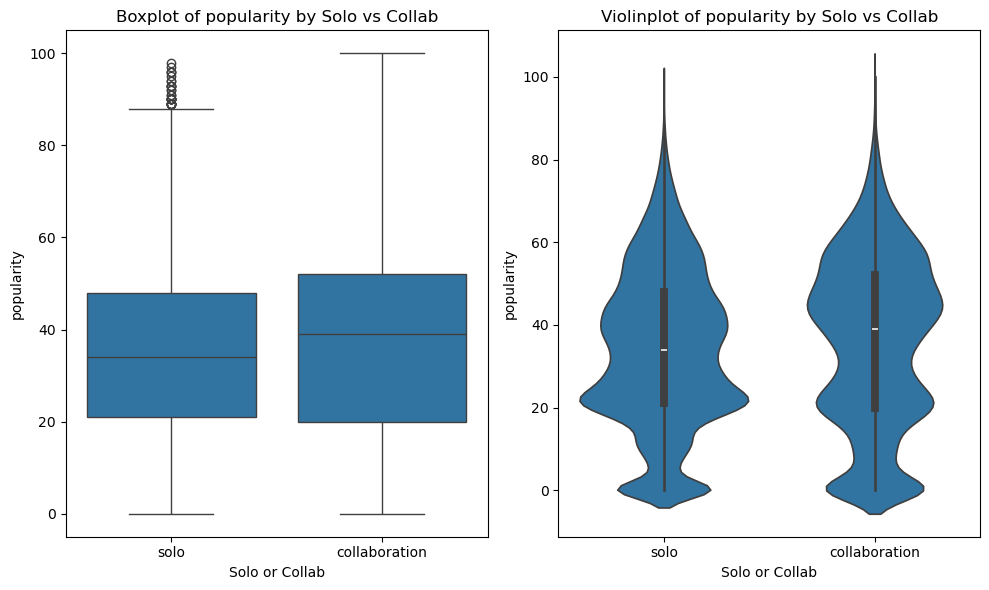

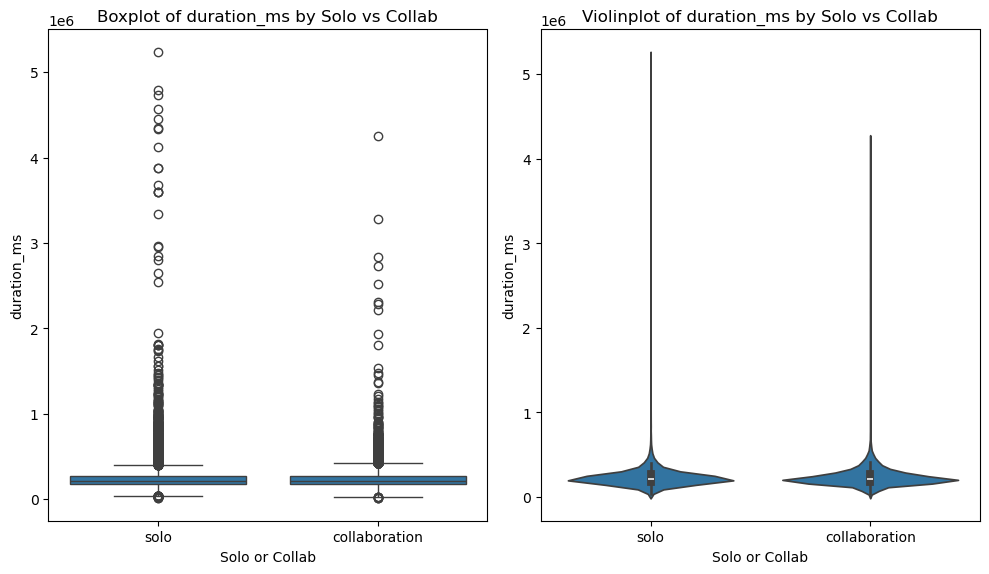

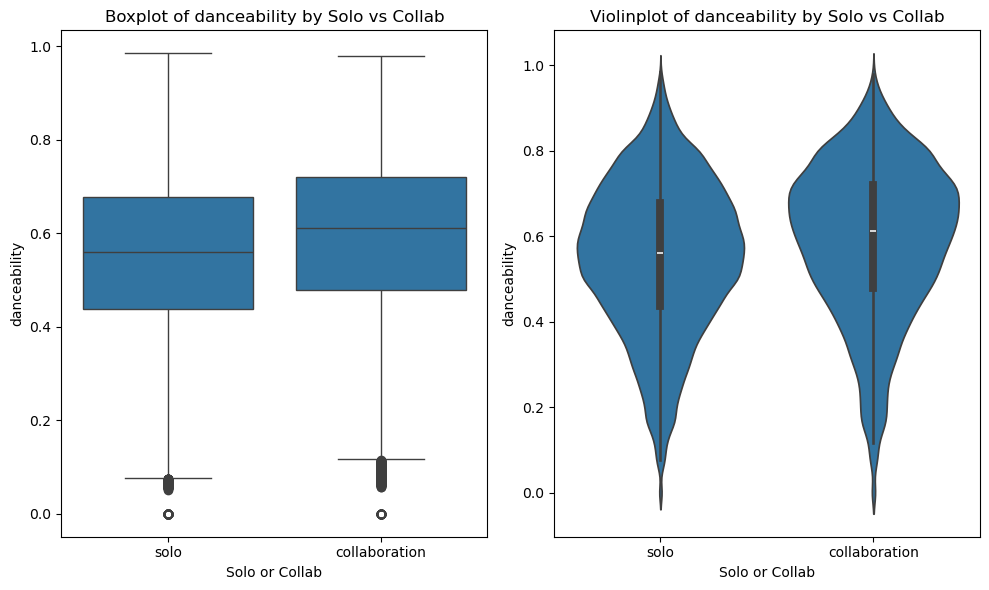

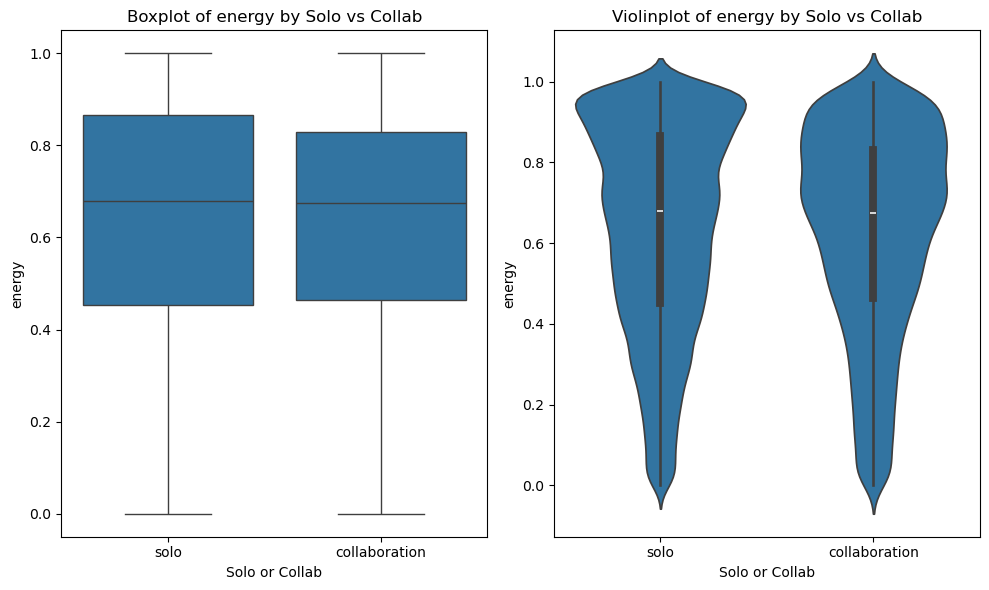

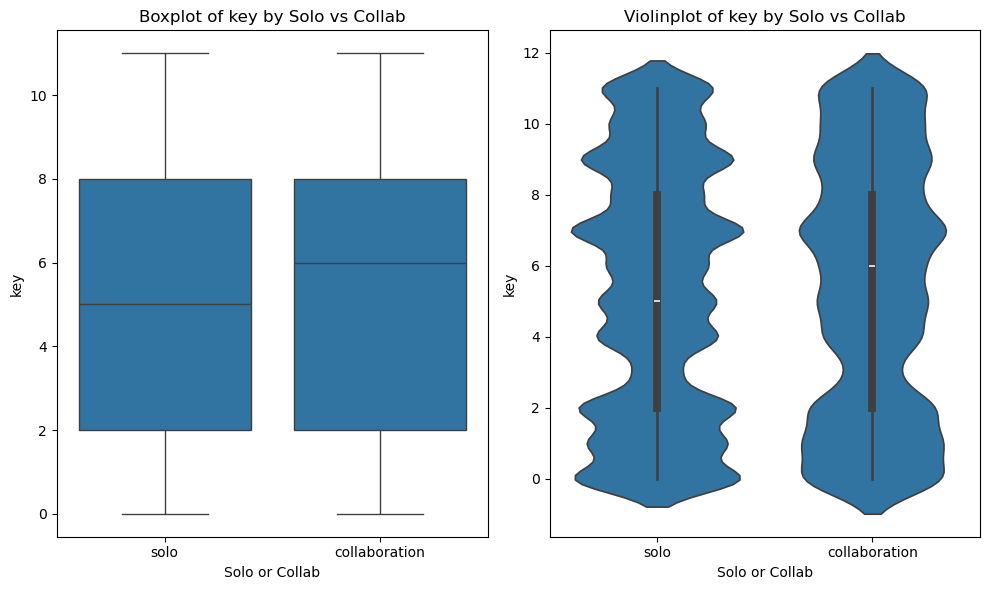

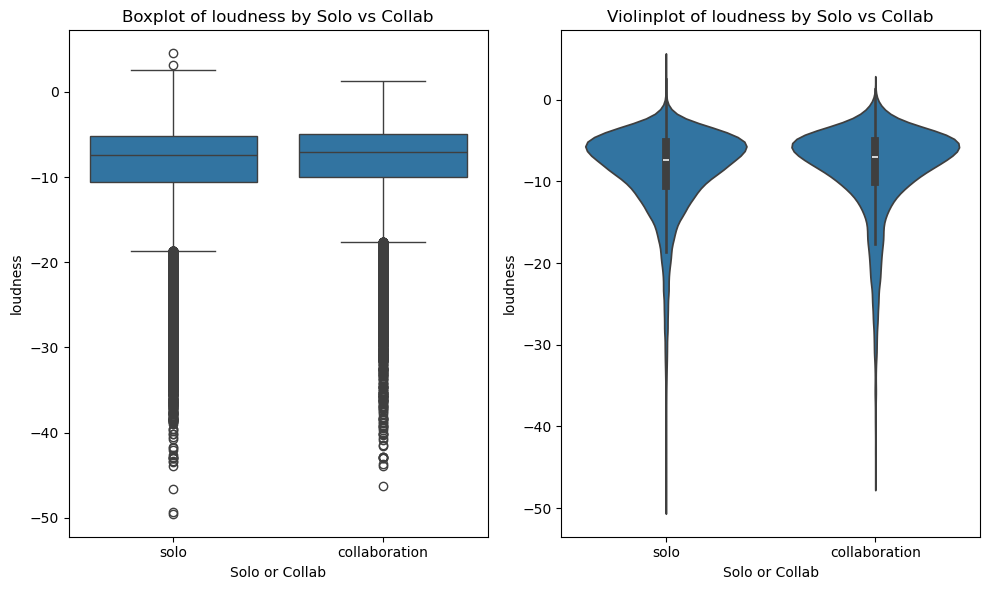

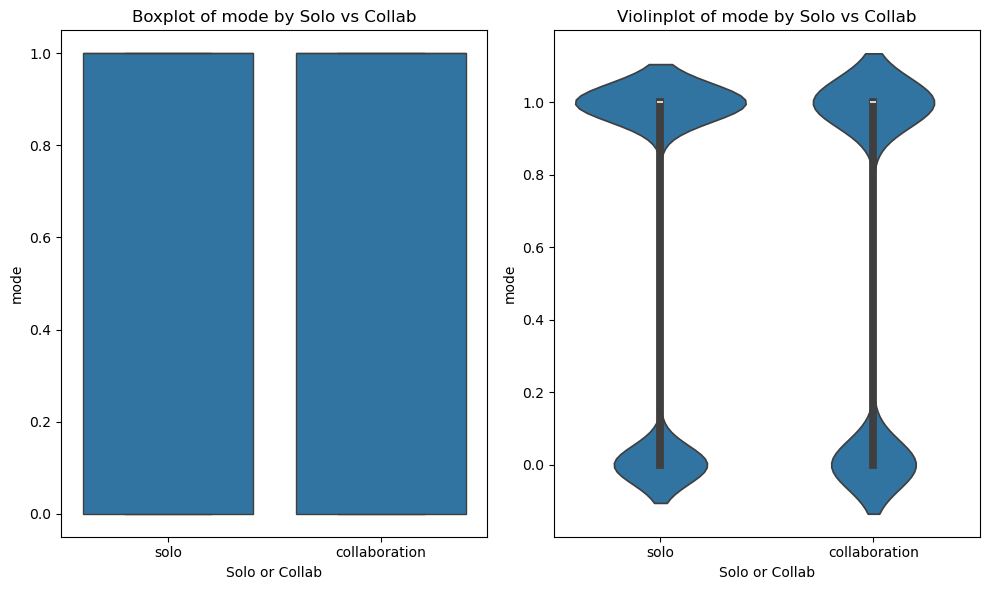

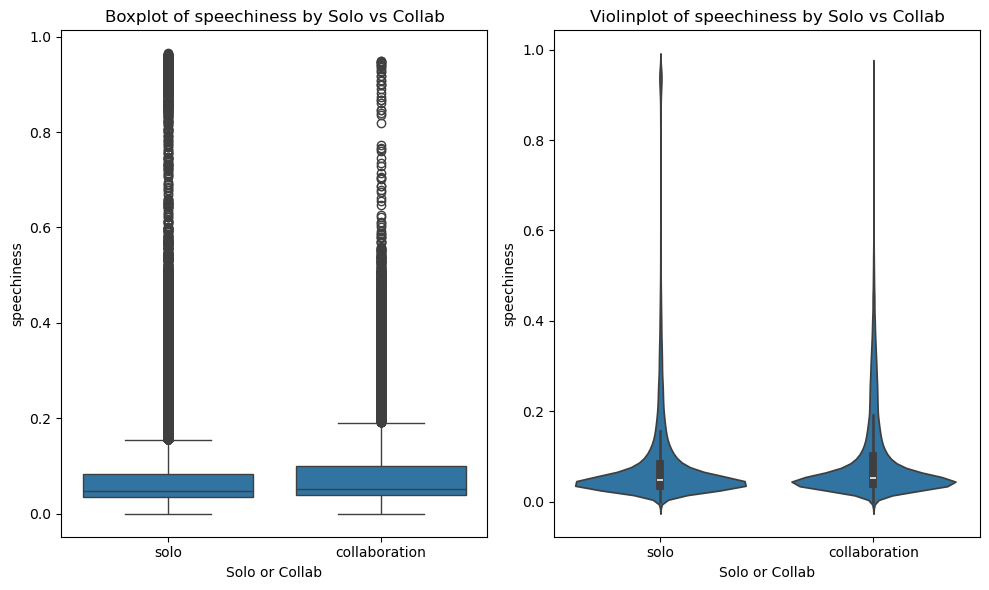

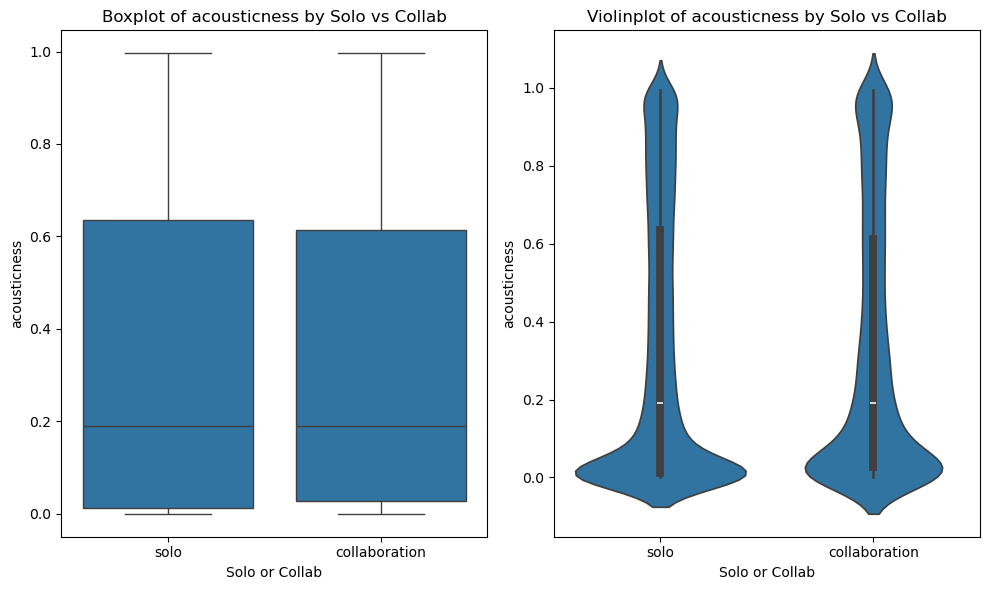

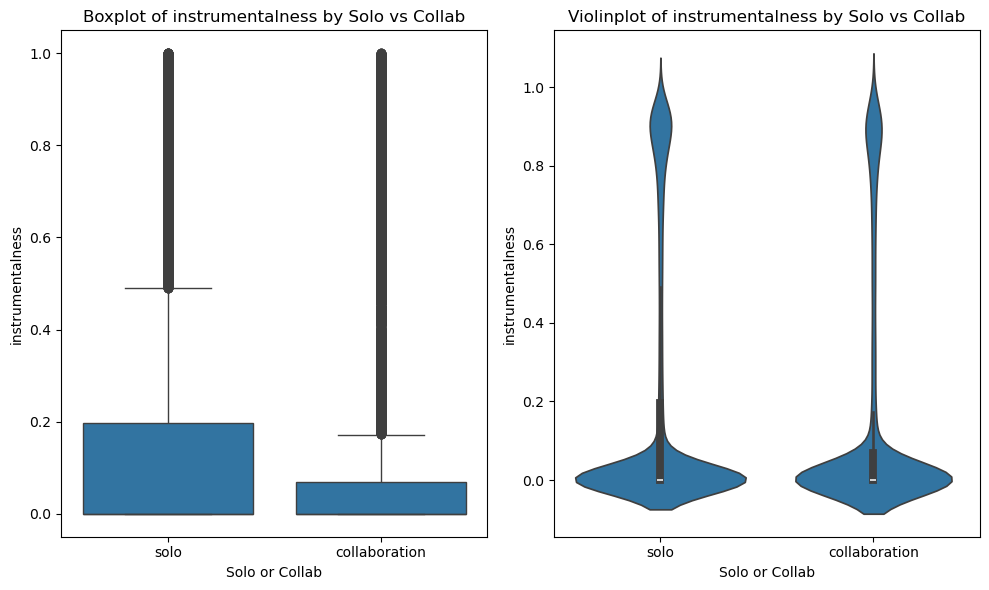

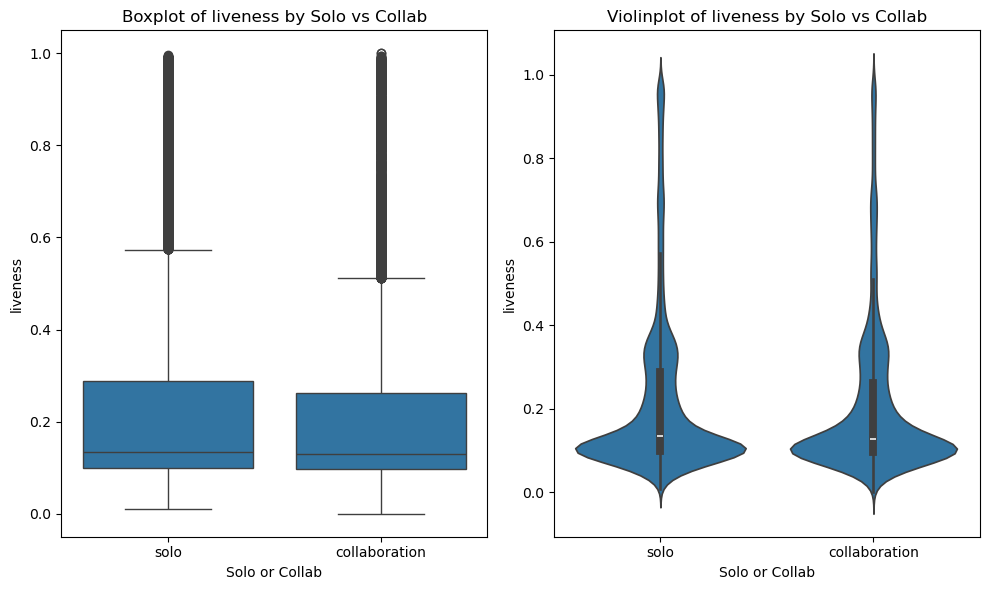

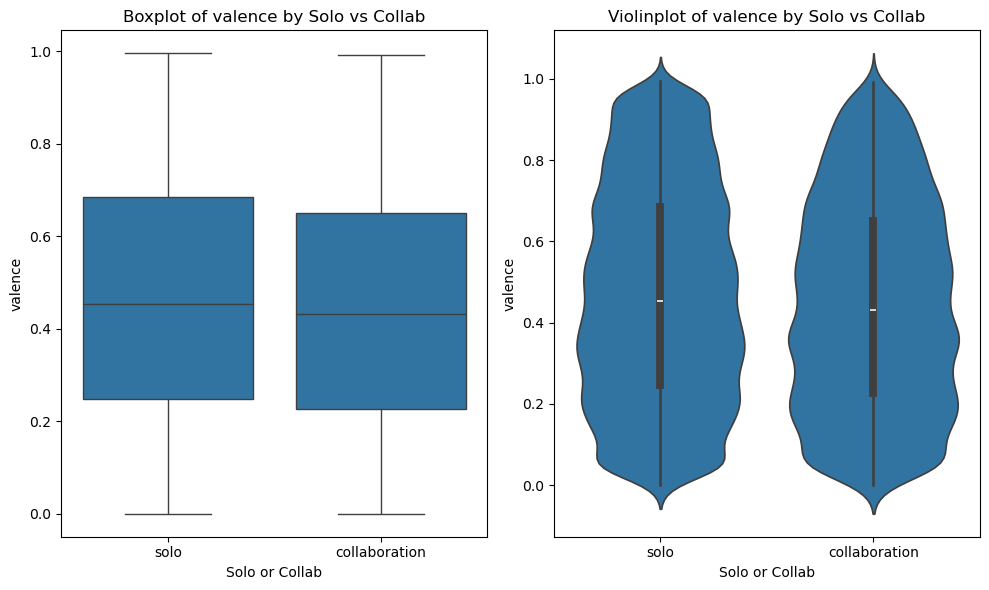

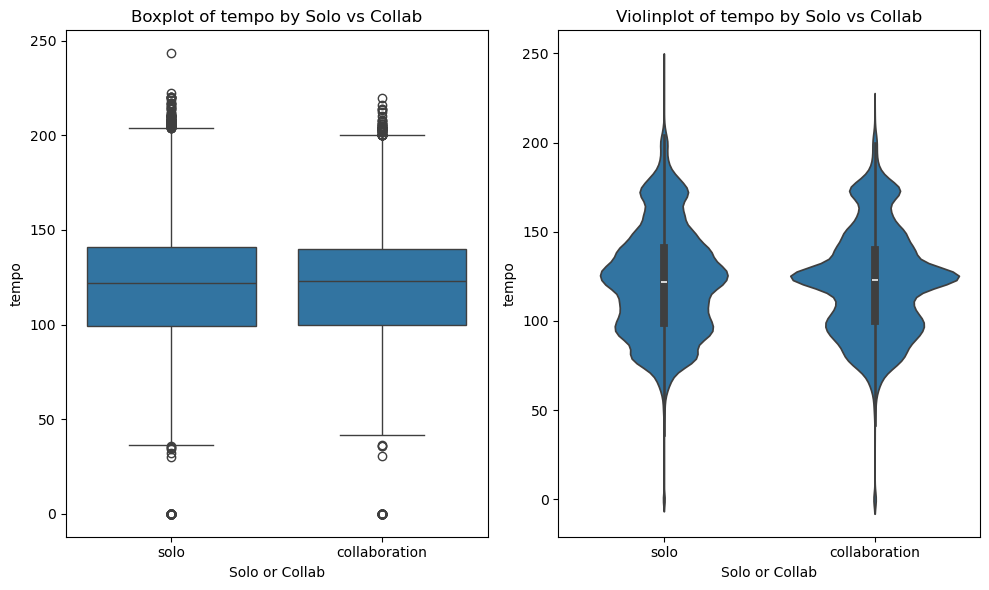

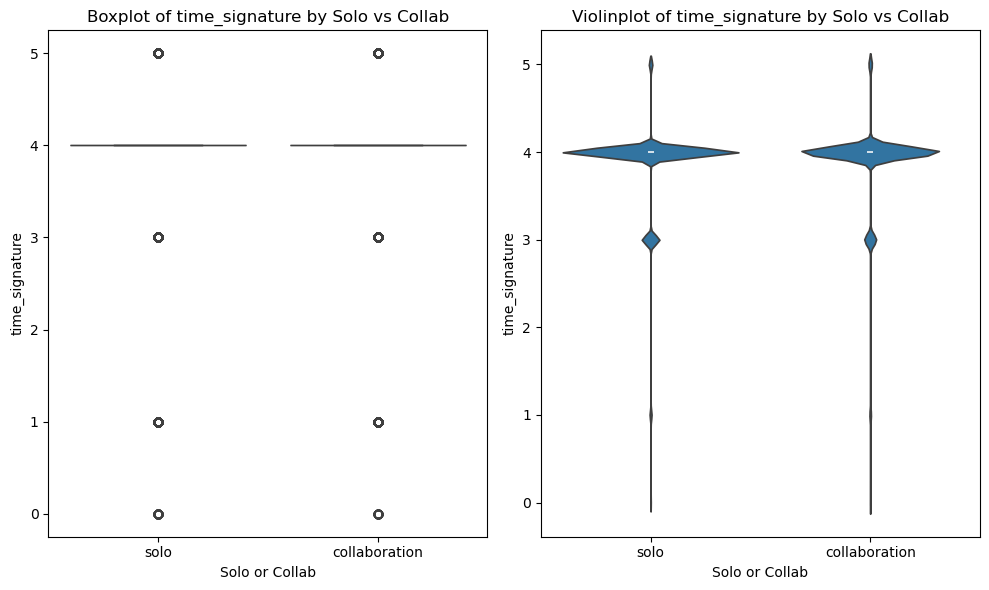

In [546]:
num_attributes = [
    "popularity",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",   
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]

for attribute in num_attributes:
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_clean, x="solo_or_collab", y=attribute)
    plt.title(f'Boxplot of {attribute} by Solo vs Collab')
    plt.xlabel('Solo or Collab')
    plt.ylabel(attribute)

    plt.subplot(1, 2, 2)
    sns.violinplot(data=df_clean, x="solo_or_collab", y=attribute)
    plt.title(f'Violinplot of {attribute} by Solo vs Collab')
    plt.xlabel('Solo or Collab')
    plt.ylabel(attribute)
 
    plt.tight_layout()
    plt.show()
        

## Popularity Analysis
We see that non-solo tracks were generally more popular, that is, collaborative tracks had a higher median and 3rd IQR but lower 1st IQR. Considering the fact that there are significantly more solo tracks and collaborative, it makes sense why collaborative would have a larger spread (standard deviation). In addition, we see that there are outliers for the solo boxplot in the high 90s area. This means that at most, the popularity of solo tracks are in the high 90s. In contrast, the most popular collaborative track has a popularity of 100. This means no solo tracks have a popularity of 100.  

In [547]:
print(f'Max popularity value: {df_solo['popularity'].max()}')
df_solo[df_solo['popularity'] > 97]

Max popularity value: 98


,artists,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,solo_or_collab
38815,Manuel Turizo,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.583,0.000002,0.218,0.85,124.98,4,latin,solo


## Duration (ms) Analysis
The durations between the solo and collaborative tracks are identical. Is it also important to point out that there are more outlier in solo tracks than collaborative tracks in terms of duration (ms) - this could be due to the significant data we have on solo tracks over collaborative tracks. From this, we see solo and collaborative tracks do not affect the duration (ms). As shown below, they both have relatively similar mean and medians.

In [548]:
print('Mean for Duration (collaboration): ', df_collab['duration_ms'].mean())
print('Mean for Duration (solo): ', df_solo['duration_ms'].mean())
print('-' * 50)
print('Mean for Duration (collaboration): ', df_collab['duration_ms'].median())
print('Mean for Duration (solo): ', df_solo['duration_ms'].median())

Mean for Duration (collaboration):  235494.4936964444
Mean for Duration (solo):  230057.14976162
--------------------------------------------------
Mean for Duration (collaboration):  214259.5
Mean for Duration (solo):  215533.0


## Danceability Analysis
Collaborative tracks are on average more danceable than solo tracks. With similar interquartile ranges (size of box), the median of collaborative tracks is higher. The minimum whisker for collaborative tracks is higher than solo tracks. In addition, we must take into account that we have significantly more data point for solo tracks than collaborative tracks so the data for collaborative may not be as reliable as solo tracks. But when we use the `describe()` function, we see that the minimum and standard deviation values are similar between solo and collaborative tracks. The noticeable differences are the `mean`, `25%`, `50%`, and `75%` values which favour collaborative tracks. We say it is noticeable when the difference between the two values (i.e., mean value of the danceability of solo and collaborative tracks) is greater than 0.05.  

In [549]:
print(df_solo['danceability'].describe())
print('-' * 50)
print(df_collab['danceability'].describe())

count    61037.000000
mean         0.549289
std          0.176113
min          0.000000
25%          0.437000
50%          0.561000
75%          0.678000
max          0.985000
Name: danceability, dtype: float64
--------------------------------------------------
count    20306.000000
mean         0.589295
std          0.179253
min          0.000000
25%          0.479000
50%          0.612000
75%          0.721000
max          0.979000
Name: danceability, dtype: float64


## Energy Analysis
There are similar medians for the energy boxplots. However, the range for the box is different. While they both have very similar medians - with collaborative tracks having a slight edge, the energy for solo tracks has a higher standard deviation than collaborative tracks. In other words, energy levels for solo tracks are more spread out and collaborative tracks are more clustered together. We can visualize this with numbers instead of a boxplot. We see that the range of the 50% of the energy levels are between [0.46, 0.86] for solo tracks and [0.50, 0.83] for collaborative tracks. Thus, we can say that the energy levels for solo tracks are more spread out because of the larger range, and our summary reveals it has a higher standard deviation than collabs. 

In [550]:
print(df_solo['energy'].describe())
print('-' * 50)
print(df_collab['energy'].describe())

count    61037.000000
mean         0.638316
std          0.260105
min          0.000020
25%          0.453000
50%          0.679000
75%          0.866000
max          1.000000
Name: energy, dtype: float64
--------------------------------------------------
count    20306.000000
mean         0.625135
std          0.253938
min          0.000000
25%          0.464000
50%          0.675000
75%          0.830000
max          1.000000
Name: energy, dtype: float64


## Key Analysis

Collaborative tracks have a higher median for key values. That is, collaborative tracks are generally include higher pitches sounds compared to solo tracks. In the beginning when found that key values of -1 meant that the key is not defined and the higher the key value, the higher pitch the track is. We see that our minimum key value is 0 so we can confidently say that this boxplot is a visual for keys in solo and collaborative tracks. If we had a lot of undefined key values in collaborative tracks, it would make this visual less accurate as we would have significantly more solo keys value than collaborative tracks than we already have.
Moreover, we see that they have a mean value of a 5.4 and 5.3 which is similar. This would be part of the F note class which sounds like "fa." In comparison to there median values, solo tracks on average (median) are classified as part of the F note class whereas collaborative tracks on average (median) are classified as part of the F# (F sharp) and Gb (G-flat major) class.

In [551]:
print(df_solo['key'].describe())
print('-' * 50)
print(df_collab['key'].describe())

count    61037.000000
mean         5.264118
std          3.550833
min          0.000000
25%          2.000000
50%          5.000000
75%          8.000000
max         11.000000
Name: key, dtype: float64
--------------------------------------------------
count    20306.000000
mean         5.351374
std          3.577268
min          0.000000
25%          2.000000
50%          6.000000
75%          8.000000
max         11.000000
Name: key, dtype: float64


## Loudness Analysis

Both the loudness for solo and collaborative tracks are similar. It is also important to point out that the loudness (measured in dB) are mainly negative values. This means that the sound level is weaker than the reference level. For example 0 dB is the threshold of the human beings - the quietest sound a human can hear under normal conditions. However, if you are in a studio booth with soundproof walls, sounds can be less detectable hence the negative values for dB.


## Mode Analysis

The box plots do not give much insight but when we look at the violin plot, we see that collaborative tracks have a higher distribution and solo tracks have a lower distribution. 

In [552]:
print(df_solo['mode'].describe())
print('-' * 50)
print(df_collab['mode'].describe())

count    61037.000000
mean         0.646772
std          0.477977
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mode, dtype: float64
--------------------------------------------------
count    20306.000000
mean         0.588988
std          0.492029
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: mode, dtype: float64


## Speechiness

Both solo and collaborative tracks share similar speechiness. As defined earlier, speechiness referes to the level of music and vocals. The higher than speechiness value, the more words spoken in the track with 1 being speech-like recordings without music, and 0 being no words spoken and music only. We see that they have a mean and median speechiness value of less than 0.10, which indicates that these tracks are primarily music with minimal words spoken. There are also significantly more outliers for solo tracks as we have a higher sample size for solo tracks in comparison to collaborative tracks.  

In [553]:
print(df_solo['speechiness'].describe())
print('-' * 50)
print(df_collab['speechiness'].describe())

count    61037.000000
mean         0.087603
std          0.122134
min          0.000000
25%          0.035300
50%          0.048000
75%          0.083500
max          0.965000
Name: speechiness, dtype: float64
--------------------------------------------------
count    20306.000000
mean         0.093170
std          0.098126
min          0.000000
25%          0.038700
50%          0.052700
75%          0.099675
max          0.950000
Name: speechiness, dtype: float64


## Acousticness Analysis

A track has high confidence in acousticness when the value is closer to 1. From the box plot, we see that both solo and collaborative tracks are not very acoustic. For the most part there values are identical, suggesting that there is not a correlation between solo and collaborative tracks in terms of acousticness. However, the value of 3rd quartile is higher for solo tracks compared to collaborative tracks. In addition, the 3rd quartile value is still low, making the majority of overall tracks low to mildly acoustic. 

In [554]:
print(df_solo['acousticness'].describe()) 
print('-' * 50)
print(df_collab['acousticness'].describe())
df_solo['acousticness'].quantile(0.75)

count    61037.000000
mean         0.329540
std          0.340656
min          0.000000
25%          0.012400
50%          0.190000
75%          0.635000
max          0.996000
Name: acousticness, dtype: float64
--------------------------------------------------
count    20306.000000
mean         0.330045
std          0.337869
min          0.000000
25%          0.026600
50%          0.190000
75%          0.613000
max          0.996000
Name: acousticness, dtype: float64


0.635

## Instrumentalness Analysis

We previously said that instrumentalness describes how much music contents there were compared to vocals (spoken words). We include sounds like "ooh" and "aah" as music contents because they are more related to instruments than words. This attribute is the opposite of speechiness. In speechiness, we saw that solo and collaborative tracks were low in speechiness - meaning that the tracks were mainly composed of music rather than spoken words. In our instrumentalness box plot, we are contradicting the speechiness box plot. The instrumentalness box plot suggests that the majority of tracks for solo and collaborative songs are low in instrumentalness, referring to high speechiness but this does not align with the speechiness box plot so further investigation is needed understand why this is. But, if we compare the instrumentalness values of solo and collaborative tracks, they have similar medians but the solo box plot range is larger. Additionally, both boxes have a lot of outliers. When we use the `describe` function, we see that the means are significantly greater than the median which means that the outliers are very significant. But we know that max instrumentalness value is 1 so there must be a lot of close-to-0 values which is evident as the median is almost 0. It would seem reasonable to drop the values of 0 but there are possibilities of podcasts, typically containing spoken words only so we cannot drop these values. However, we can visualize what the box plot would look like without the 0.0 values. This may not be accurate but could be insightful since there is also a possibility that 0.0 is used as the default value for tracks without an instrumentalness value. 

In [555]:
print(df_solo['instrumentalness'].describe())
print('-' * 50)
print(df_collab['instrumentalness'].describe())

count    61037.000000
mean         0.192425
std          0.337649
min          0.000000
25%          0.000000
50%          0.000107
75%          0.196000
max          1.000000
Name: instrumentalness, dtype: float64
--------------------------------------------------
count    20306.000000
mean         0.161611
std          0.311547
min          0.000000
25%          0.000000
50%          0.000050
75%          0.069100
max          1.000000
Name: instrumentalness, dtype: float64


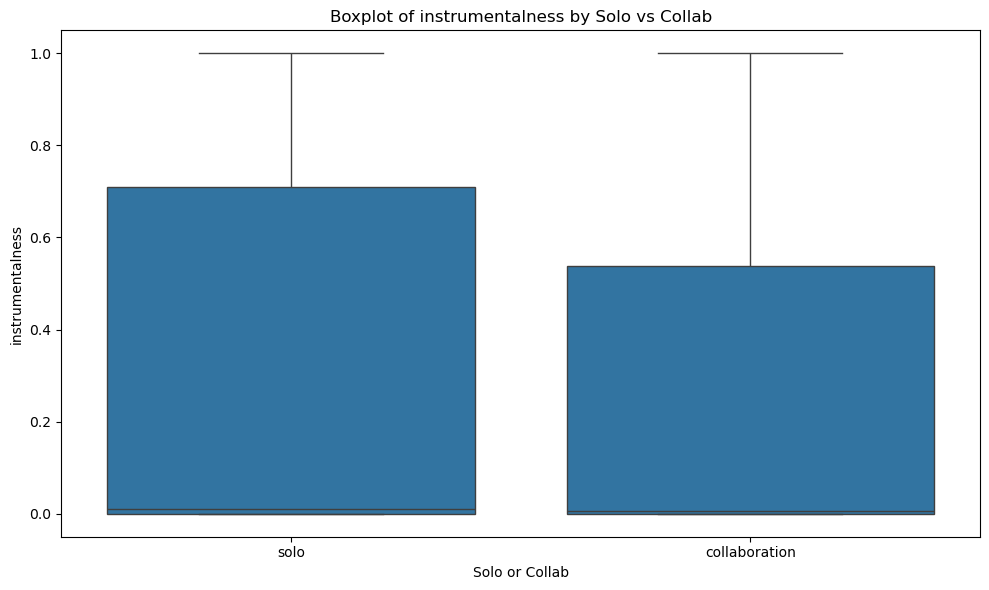

In [556]:
plt.figure(figsize=(10, 6))

temp_df = df_clean[df_clean['instrumentalness'] != 0.0]

sns.boxplot(data=temp_df, x="solo_or_collab", y='instrumentalness')
plt.title('Boxplot of instrumentalness by Solo vs Collab')
plt.xlabel('Solo or Collab')
plt.ylabel('instrumentalness')
plt.tight_layout()
plt.show()


In [557]:
print(temp_df[temp_df['solo_or_collab'] == 'solo']['instrumentalness'].describe())
print('-' * 50)
print(temp_df[temp_df['solo_or_collab'] == 'collaboration']['instrumentalness'].describe())

count    41800.000000
mean         0.280983
std          0.376288
min          0.000001
25%          0.000076
50%          0.010200
75%          0.710000
max          1.000000
Name: instrumentalness, dtype: float64
--------------------------------------------------
count    13423.000000
mean         0.244481
std          0.355773
min          0.000001
25%          0.000056
50%          0.005380
75%          0.538000
max          1.000000
Name: instrumentalness, dtype: float64


As expected, we see that the 1st quartile and 3rd quartile increased significantly. Although the median is still low, the size of the box is bigger. That is, the difference between the 1st quartile and 3rd quartile has increased. This might better represent the previous plot because if our speechiness suggests a low value, the instrumentalness value must be higher. There are inaccuracies but this plot better aligns with the speechiness plot. In terms of correlation, we see that solo tracks are typically more instrumental than collaborative track. Both of our box plots agree with this.

## Liveness Analysis

The box plots are similar for liveness with the solo tracks having a larger range between the 1st quartile and 3rd quartile. From this, it does not look like the musical attribute - liveness change when artists work solo or collaborate.

In [558]:
print(df_solo['liveness'].describe())
print('-' * 50)
print(df_collab['liveness'].describe())

count    61037.000000
mean         0.223335
std          0.202337
min          0.009250
25%          0.099100
50%          0.134000
75%          0.289000
max          0.997000
Name: liveness, dtype: float64
--------------------------------------------------
count    20306.000000
mean         0.208865
std          0.185097
min          0.000000
25%          0.096900
50%          0.129000
75%          0.262750
max          1.000000
Name: liveness, dtype: float64


## Valence Analysis

Valence represents the positivity and negativity of a track. The higher the valence value, the more happy the track will sound like and the lower the valence value, the more sad and angry the track will sound like. In our box plot, we have identical boxes which suggests how happy, sad, or angry a track sounds - it has no correlation with artists who work solo or collaborate. It is evident that both boxes are identical as shown below:

In [559]:
print(df_solo['valence'].describe())
print('-' * 50)
print(df_collab['valence'].describe())

count    61037.000000
mean         0.469337
std          0.265383
min          0.000000
25%          0.247000
50%          0.454000
75%          0.684000
max          0.995000
Name: valence, dtype: float64
--------------------------------------------------
count    20306.000000
mean         0.445061
std          0.256424
min          0.000000
25%          0.227000
50%          0.432000
75%          0.650000
max          0.992000
Name: valence, dtype: float64


## Tempo Analysis

Tempo is the speed of the track in beats per minute (BPM). We see that the median tempo for solo tracks is identical to collaborative tracks. Generally we would expect collaborative tracks to high tempo. Although this is not proven to be true - personal experience leans us to assume that collaborative tracks have higher tempo. All this to say that the tempo of the track does not change when artists work solo or collaborate.

In [560]:
print(df_solo['tempo'].describe())  
print('-' * 50)
print(df_collab['tempo'].describe())

count    61037.000000
mean       122.320959
std         30.366963
min          0.000000
25%         99.043000
50%        121.999000
75%        141.063000
max        243.372000
Name: tempo, dtype: float64
--------------------------------------------------
count    20306.000000
mean       121.615429
std         29.396558
min          0.000000
25%         99.959250
50%        122.941000
75%        139.967000
max        219.693000
Name: tempo, dtype: float64


## Time Signature Analysis

Time signature is the number of beats in a bar. We see that the time signature for solo and collaborative tracks are identical. This means that the number of beats in a bar does not change when artists work solo or collaborate.

In [561]:
print(df_solo['time_signature'].describe())
print('-' * 50)
print(df_collab['time_signature'].describe())

count    61037.000000
mean         3.893376
std          0.454426
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64
--------------------------------------------------
count    20306.000000
mean         3.907761
std          0.462120
min          0.000000
25%          4.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64


In [562]:
def residuals_function_1(attribute):
    model_lin = smf.ols(f'{attribute} ~ solo_or_collab', data=df_clean).fit()
    print(model_lin.summary())
    plt.hist(model_lin.resid, 
        density=True,      
        bins=100,        
        label="residuals" 
        )
  
    xx = np.linspace(model_lin.resid.min(), model_lin.resid.max(), num=1000)
    mad_val=np.median(np.absolute(model_lin.resid))
    plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=1.5*mad_val),
        label="normal distribution")
    outliers = np.abs(model_lin.resid)>6*mad_val
    sns.rugplot(model_lin.resid[outliers],
                color="C5", # otherwise the rugplot has the same color as the histogram
                label="outliers")
    plt.legend(loc="upper right");

    return model_lin

#same as previous but for outliers
def residuals_function_no_out(attribute):
    model_lin = smf.ols(f'{attribute} ~ solo_or_collab', data=df_clean_no_outliers).fit()
    print(model_lin.summary())
    plt.hist(model_lin.resid, 
        density=True,      
        bins=100,        
        label="residuals" 
        )
  
    xx = np.linspace(model_lin.resid.min(), model_lin.resid.max(), num=1000)
    mad_val=np.median(np.absolute(model_lin.resid))
    plt.plot(xx, scipy.stats.norm.pdf(xx, loc=0.0, scale=1.5*mad_val),
        label="normal distribution")
    outliers = np.abs(model_lin.resid)>6*mad_val
    sns.rugplot(model_lin.resid[outliers],
                color="C5", # otherwise the rugplot has the same color as the histogram
                label="outliers")
    plt.legend(loc="upper right");

    return model_lin

def residuals_function_2(model_lin):
    sm.qqplot(model_lin.resid, line="s"); # Normally distributed residuals would be along the line

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     141.1
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.60e-32
Time:                        17:56:52   Log-Likelihood:            -3.5672e+05
No. Observations:               81343   AIC:                         7.134e+05
Df Residuals:                   81341   BIC:                         7.135e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 36

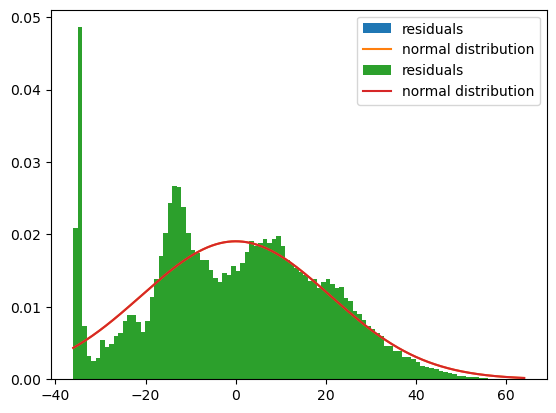

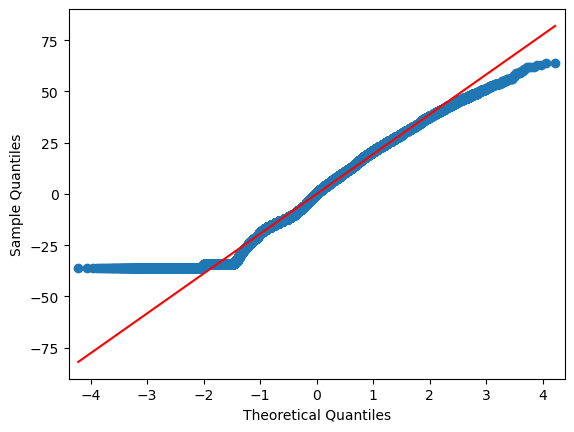

In [563]:
residuals_function_1('popularity')
residuals_function_2(residuals_function_1('popularity'))
# residuals = residuals_function_1('popularity').resid
# predict =  residuals_function_1('popularity').fittedvalues
# df_clean['popularity'] - predict

## Brief Analysis:

High variance indicates that the model might not be capturing all the complexities of the data.

Centering at 0 means there is no overall bias, but it doesn't resolve issues with accuracy or fit.

This model suggests that we can reject the null hypothesis as the p-value is less than 0.05. In addition, the coefficient is -1.9 when testing collaborative tracks with solo tracks. This means tht solo tracks have a lower popularity than collaborative tracks by 1.9 points. 

                            OLS Regression Results                            
Dep. Variable:            duration_ms   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     33.21
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           8.31e-09
Time:                        17:56:54   Log-Likelihood:            -1.0643e+06
No. Observations:               81343   AIC:                         2.129e+06
Df Residuals:                   81341   BIC:                         2.129e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2.35

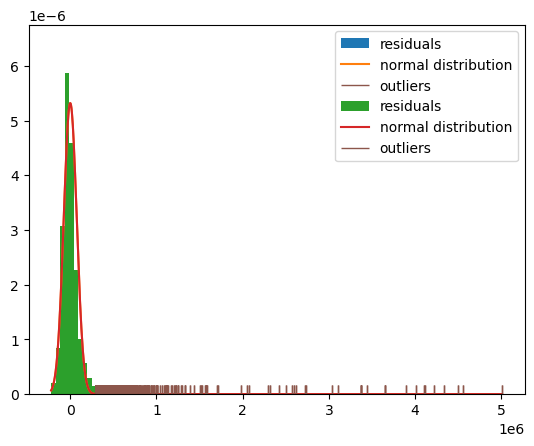

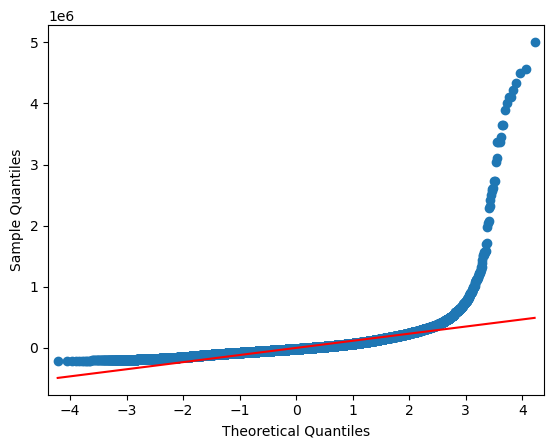

In [564]:
residuals_function_1('duration_ms')
residuals_function_2(residuals_function_1('duration_ms'))

## Brief Analysis:

Low variance indicates that the model is fit for capturing all the complexities of the data.

Centering at 0 means there is no overall bias, but it doesn't resolve issues with accuracy or fit.

This model suggests that we can reject the null hypothesis as the p-value is less than 0.05. In addition, the coefficient is -5437ms which means solo tracks have a duration 5437 milliseconds shorter than collaboration tracks.

                            OLS Regression Results                            
Dep. Variable:           danceability   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     779.2
Date:                Thu, 12 Dec 2024   Prob (F-statistic):          1.13e-170
Time:                        17:56:56   Log-Likelihood:                 25479.
No. Observations:               81343   AIC:                        -5.095e+04
Df Residuals:                   81341   BIC:                        -5.094e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

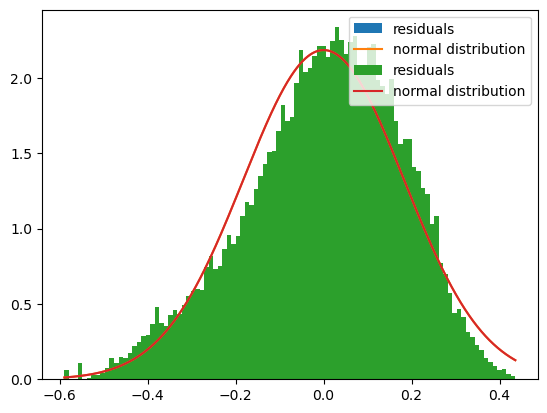

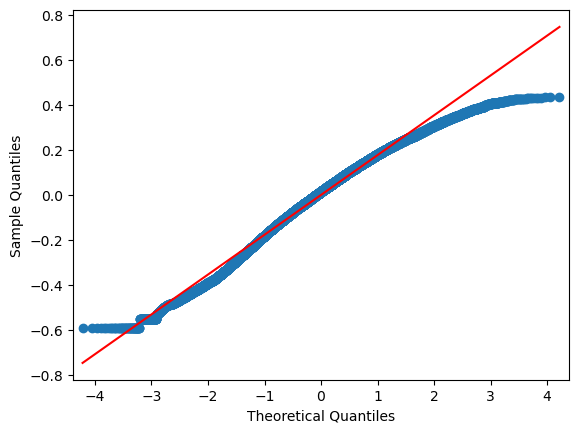

In [565]:
residuals_function_1('danceability')
residuals_function_2(residuals_function_1('danceability'))

# Brief Analysis:

Good model with minimal variance and outliers.

                            OLS Regression Results                            
Dep. Variable:                 energy   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     39.59
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           3.15e-10
Time:                        17:56:58   Log-Likelihood:                -5399.1
No. Observations:               81343   AIC:                         1.080e+04
Df Residuals:                   81341   BIC:                         1.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

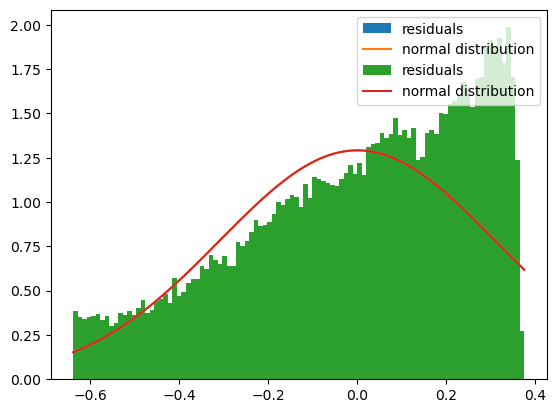

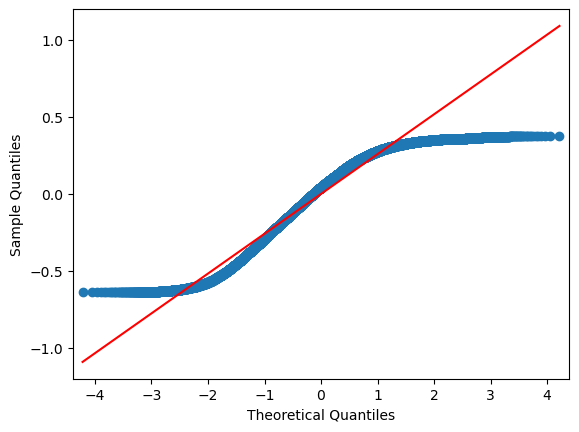

In [566]:
residuals_function_1('energy')
residuals_function_2(residuals_function_1('energy'))  

# Brief Analysis:

Not a good model.

                            OLS Regression Results                            
Dep. Variable:                    key   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     9.167
Date:                Thu, 12 Dec 2024   Prob (F-statistic):            0.00247
Time:                        17:57:00   Log-Likelihood:            -2.1865e+05
No. Observations:               81343   AIC:                         4.373e+05
Df Residuals:                   81341   BIC:                         4.373e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  5

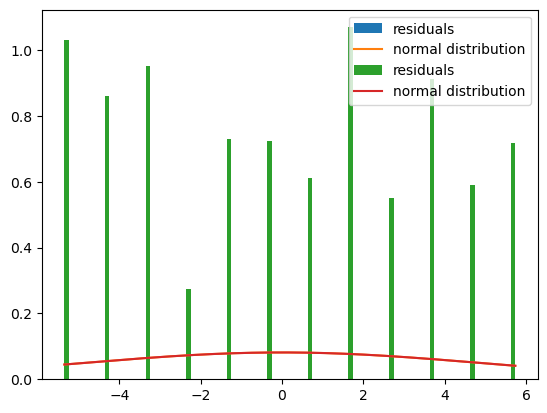

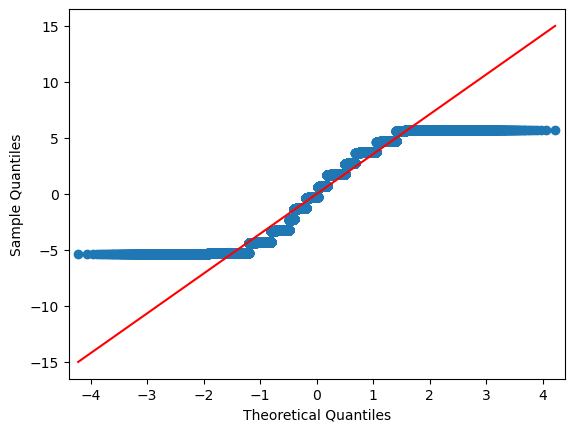

In [567]:
residuals_function_1('key')
residuals_function_2(residuals_function_1('key'))

# Brief Analysis:

Very high variance, not a good model.

                            OLS Regression Results                            
Dep. Variable:               loudness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.040
Date:                Thu, 12 Dec 2024   Prob (F-statistic):            0.00458
Time:                        17:57:01   Log-Likelihood:            -2.5115e+05
No. Observations:               81343   AIC:                         5.023e+05
Df Residuals:                   81341   BIC:                         5.023e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -8

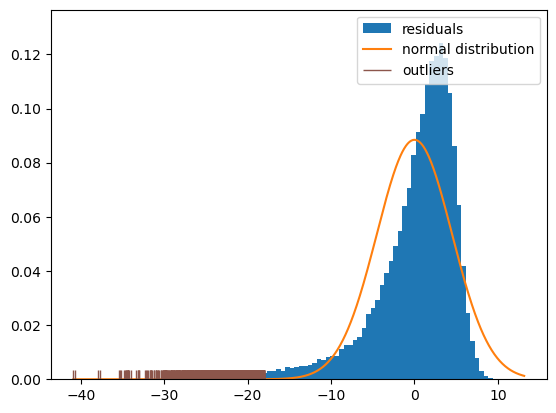

In [568]:
residuals_function_1('loudness')
# residuals_function_2(residuals_function_1('loudness'))

There are a lot of outliers so we will remove them.

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     140.4
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           2.36e-32
Time:                        17:57:02   Log-Likelihood:            -3.5653e+05
No. Observations:               81322   AIC:                         7.131e+05
Df Residuals:                   81320   BIC:                         7.131e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 36

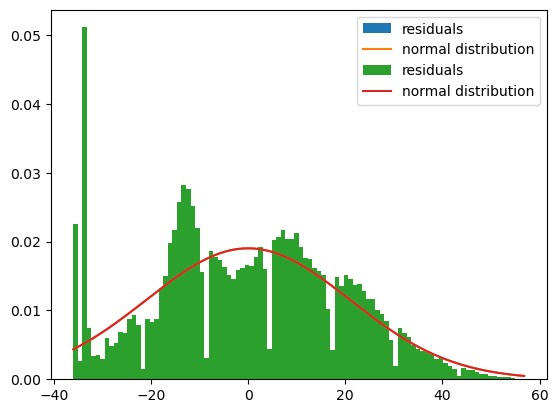

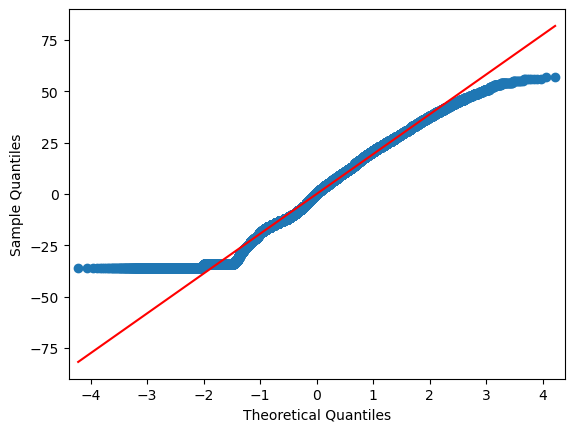

In [569]:
q1 = df_clean['popularity'].quantile(0.25)
q3 = df_clean['popularity'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

df_clean_no_outliers = df_clean[(df_clean['popularity'] >= lower_bound) & (df_clean['popularity'] <= upper_bound)]

residuals_function_no_out('popularity')
residuals_function_2(residuals_function_no_out('popularity'))


# Brief Analysis:

This plot is a better representation of the previous plot.

                            OLS Regression Results                            
Dep. Variable:                   mode   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     219.4
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.41e-49
Time:                        17:57:04   Log-Likelihood:                -55974.
No. Observations:               81343   AIC:                         1.120e+05
Df Residuals:                   81341   BIC:                         1.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

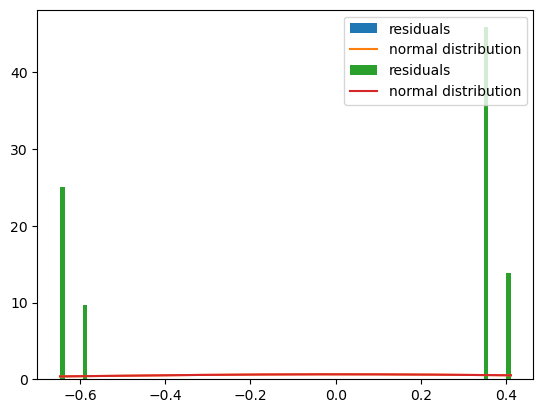

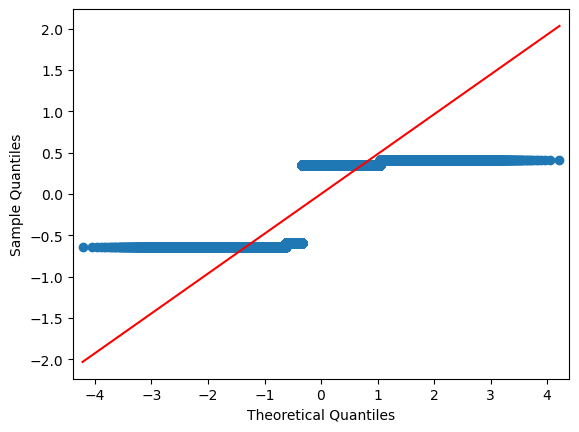

In [570]:
residuals_function_1('mode')
residuals_function_2(residuals_function_1('mode'))

# Brief Analysis:

Extremely high variance, not a good model.

                            OLS Regression Results                            
Dep. Variable:            speechiness   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     128.5
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           9.04e-30
Time:                        17:57:23   Log-Likelihood:             1.4931e+05
No. Observations:               71656   AIC:                        -2.986e+05
Df Residuals:                   71654   BIC:                        -2.986e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

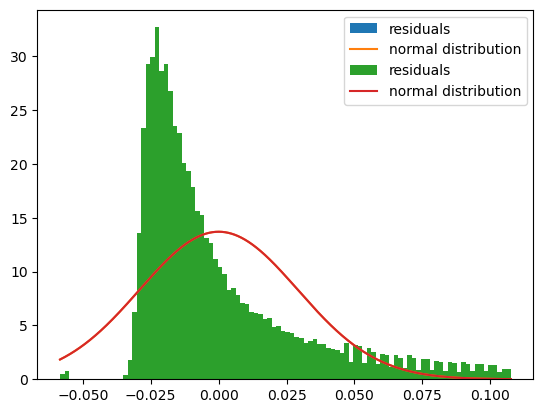

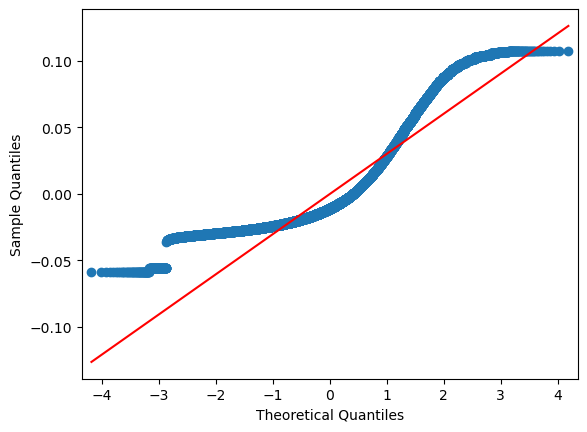

In [579]:
q1 = df_clean['speechiness'].quantile(0.25)
q3 = df_clean['speechiness'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

df_clean_no_outliers = df_clean[(df_clean['speechiness'] >= lower_bound) & (df_clean['speechiness'] <= upper_bound)]

residuals_function_no_out('speechiness')
residuals_function_2(residuals_function_no_out('speechiness'))

# residuals_function_1('speechiness')

# residuals_function_2(residuals_function_1('speechiness'))

# Brief Analysis:

Outliers heavily affect the model here, the bell shape transformed a lot to the right and the model is not a good fit. After we removed the outliers, we see that are over-predicting the data and the model is not well suited for this data.

                            OLS Regression Results                            
Dep. Variable:           acousticness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.03368
Date:                Thu, 12 Dec 2024   Prob (F-statistic):              0.854
Time:                        17:57:08   Log-Likelihood:                -27657.
No. Observations:               81343   AIC:                         5.532e+04
Df Residuals:                   81341   BIC:                         5.534e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

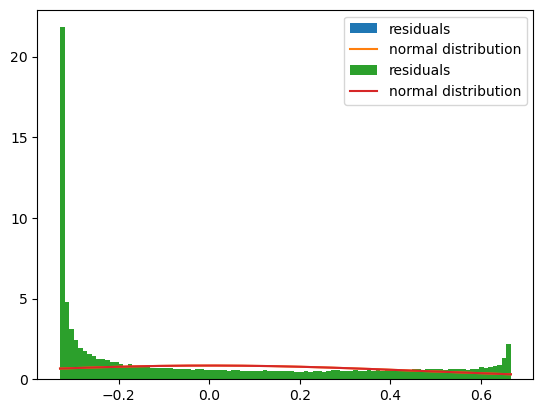

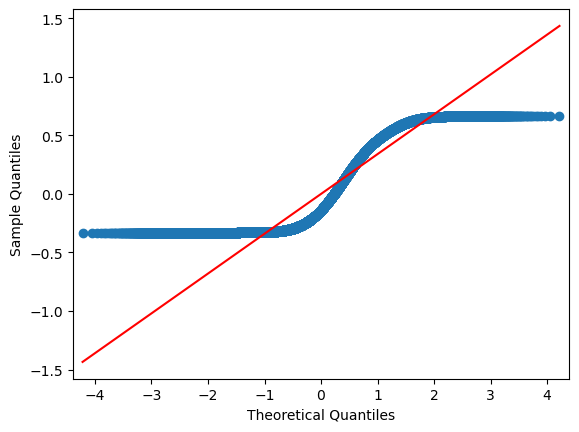

In [572]:
residuals_function_1('acousticness')
residuals_function_2(residuals_function_1('acousticness'))

# Brief Analysis:

Variance is high, not a good model.

                            OLS Regression Results                            
Dep. Variable:       instrumentalness   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     131.8
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           1.75e-30
Time:                        17:57:10   Log-Likelihood:                -25564.
No. Observations:               81343   AIC:                         5.113e+04
Df Residuals:                   81341   BIC:                         5.115e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

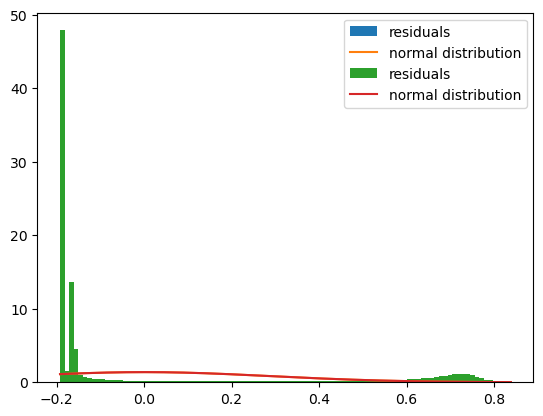

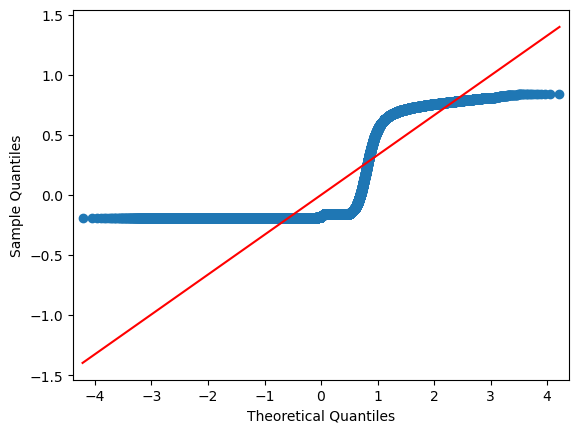

In [573]:
residuals_function_1('instrumentalness')
residuals_function_2(residuals_function_1('instrumentalness'))

# Brief Analysis:

Variance is high, not a good model.

                            OLS Regression Results                            
Dep. Variable:               liveness   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     16.40
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           5.14e-05
Time:                        17:58:37   Log-Likelihood:                 59085.
No. Observations:               74842   AIC:                        -1.182e+05
Df Residuals:                   74840   BIC:                        -1.181e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

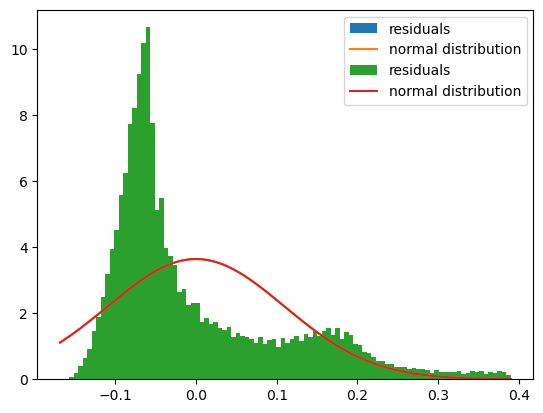

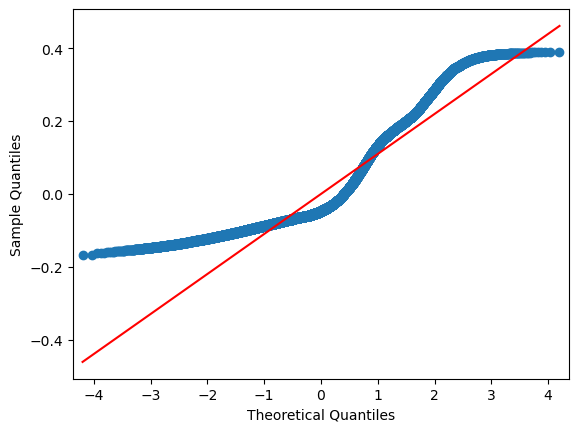

In [580]:
q1 = df_clean['liveness'].quantile(0.25)
q3 = df_clean['liveness'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

df_clean_no_outliers = df_clean[(df_clean['liveness'] >= lower_bound) & (df_clean['liveness'] <= upper_bound)]

residuals_function_no_out('liveness')
residuals_function_2(residuals_function_no_out('liveness'))

# residuals_function_1('liveness')
# residuals_function_2(residuals_function_1('liveness'))

# Brief Analysis:

Outliers heavily affect the model here. After the outliers were removed, we still see that this model does not suit this data very well as the bell shape has transformed to the right.

                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     129.6
Date:                Thu, 12 Dec 2024   Prob (F-statistic):           5.17e-30
Time:                        17:57:14   Log-Likelihood:                -6832.0
No. Observations:               81343   AIC:                         1.367e+04
Df Residuals:                   81341   BIC:                         1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

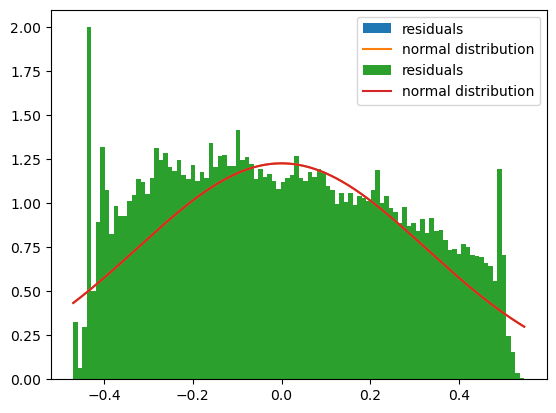

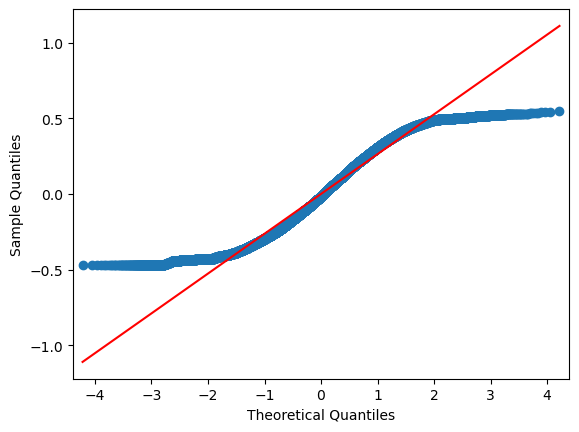

In [575]:
residuals_function_1('valence')
residuals_function_2(residuals_function_1('valence'))

# Brief Analysis:

Very high variance, not a good model.

                            OLS Regression Results                            
Dep. Variable:                  tempo   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.356
Date:                Thu, 12 Dec 2024   Prob (F-statistic):            0.00385
Time:                        17:57:16   Log-Likelihood:            -3.9243e+05
No. Observations:               81343   AIC:                         7.849e+05
Df Residuals:                   81341   BIC:                         7.849e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                121

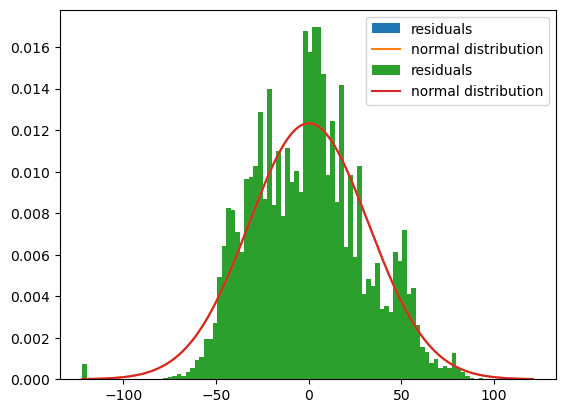

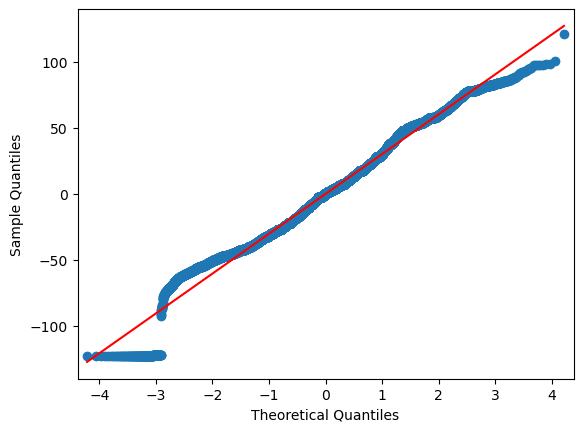

In [576]:
residuals_function_1('tempo')
residuals_function_2(residuals_function_1('tempo'))

# Brief Analysis:

Great model but we are over-predicting in some areas and under-predicting in others.

c:\Users\fabie\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:         time_signature   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                -7.198e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               1.00
Time:                        18:00:19   Log-Likelihood:             2.0127e+06
No. Observations:               71986   AIC:                        -4.025e+06
Df Residuals:                   71984   BIC:                        -4.025e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

c:\Users\fabie\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                            OLS Regression Results                            
Dep. Variable:         time_signature   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                -7.198e+04
Date:                Thu, 12 Dec 2024   Prob (F-statistic):               1.00
Time:                        18:00:19   Log-Likelihood:             2.0127e+06
No. Observations:               71986   AIC:                        -4.025e+06
Df Residuals:                   71984   BIC:                        -4.025e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  4

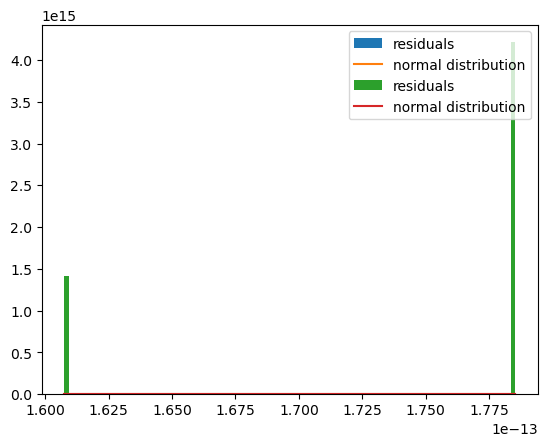

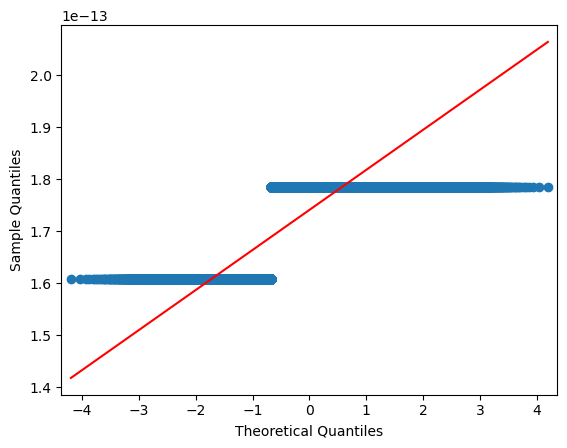

In [583]:
q1 = df_clean['time_signature'].quantile(0.25)
q3 = df_clean['time_signature'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

df_clean_no_outliers = df_clean[(df_clean['time_signature'] >= lower_bound) & (df_clean['time_signature'] <= upper_bound)]

residuals_function_no_out('time_signature')
residuals_function_2(residuals_function_no_out('time_signature'))

# residuals_function_1('time_signature')
# residuals_function_2(residuals_function_1('time_signature'))

# Brief Analysis:

Outliers heavily affect the model here. After the outliers were removed, we still see that this model does not suit this data very well.

### We then move on to analyzing the categorical columns - `explicit` and `track_genre`.

We know we have significantly more data points for solo tracks than collaborative tracks. If we were to visualize the data, we would see that solo tracks have a higher frequency in all musical attributes. So countplots are not the best way to visualize the data as shown below. Moreover, countplots are not the best way to visualize the data as shown below. We will use a violin plot to better visualize the data as it also displays the distribution.

KeyboardInterrupt: 

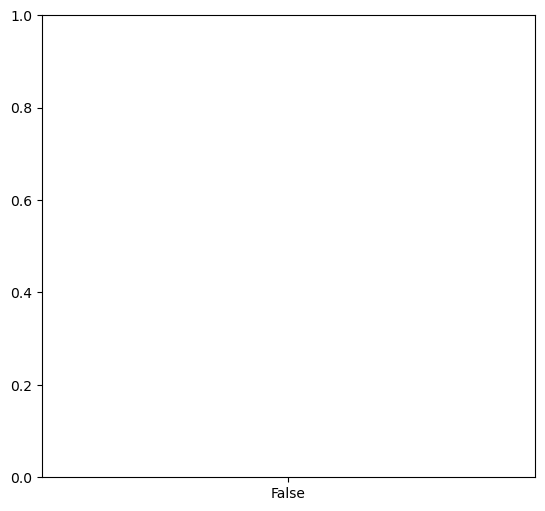

In [578]:
cat_attributes = [
    # 'mode',
    'explicit',
    'track_genre',
]   

for attribute in cat_attributes:
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    sns.countplot(data=df_clean, x=attribute, hue="solo_or_collab")
    plt.title(f'Count Plot of {attribute} by Solo vs Collab')
    plt.xlabel(attribute)
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    sns.violinplot(data=df_clean, x=attribute, hue="solo_or_collab")
    plt.title(f'Violin Plot of {attribute} by Solo vs Collab')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    
    plt.tight_layout()
    plt.show()
    

Although we see that solo tracks have a higher frequency in track_genre, the plot is hard to read. So we create simulation to randomly select 10 genres to get a zoomed-in visualization of the above. 

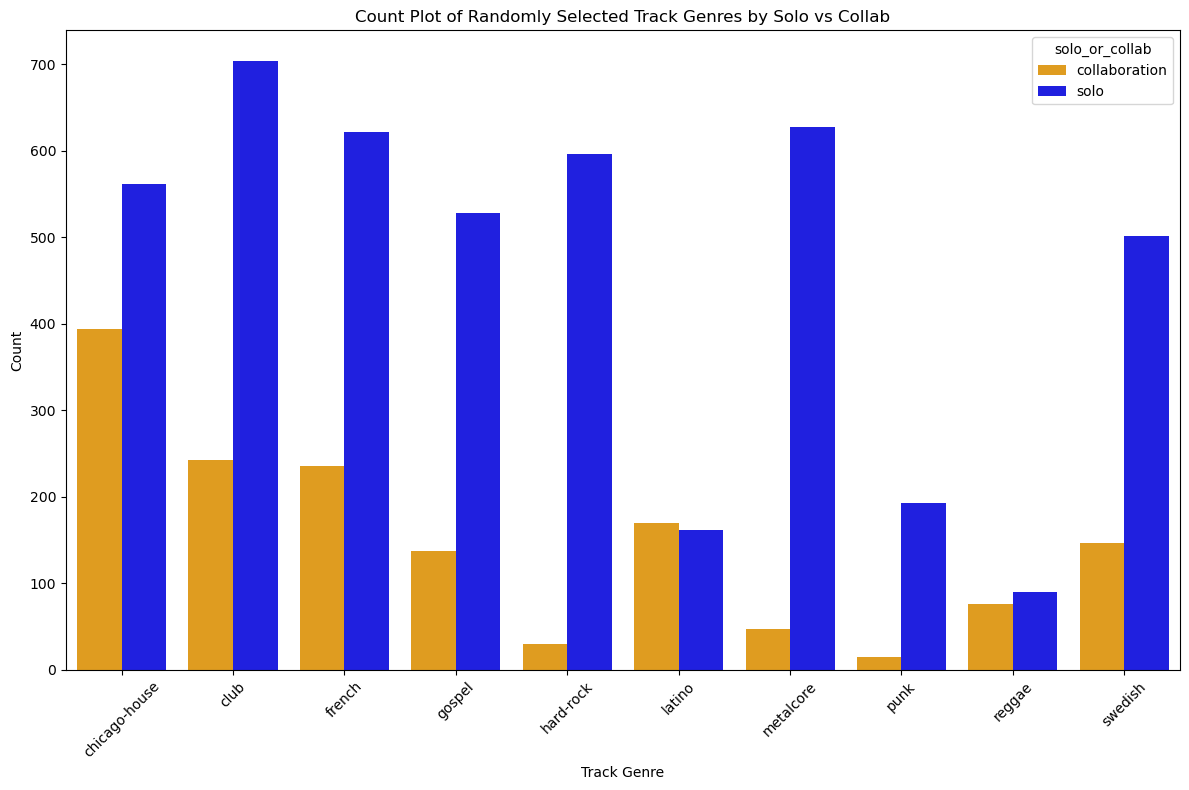

In [520]:
unique_genres = df_clean['track_genre'].unique()
random_genres = np.random.choice(unique_genres, 10, replace=False)

df_simulation = df_clean[df_clean['track_genre'].isin(random_genres)]

plt.figure(figsize=(12, 8))
sns.countplot(data=df_simulation, x='track_genre', hue='solo_or_collab', palette={'solo': 'blue', 'collaboration': 'orange'})
plt.title('Count Plot of Randomly Selected Track Genres by Solo vs Collab')
plt.xlabel('Track Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

For the most part, there are higher frequencies in the solo tracks for all genres as it appears. To be more precise, we can filter to find the genres with collaborative tracks having a higher frequency.

In [521]:
more_collab = 0
more_solo = 0
more_collab_genres = []

for genre in df_clean['track_genre'].unique():
    if df_collab[df_collab['track_genre'] == genre].shape[0] > df_solo[df_solo['track_genre'] == genre].shape[0]:
        print(f'Genre: {genre}')
        print(f'Solo: {df_solo[df_solo["track_genre"] == genre].shape[0]}')
        print(f'Collab: {df_collab[df_collab["track_genre"] == genre].shape[0]}')
        print('-' * 50)
        more_collab += 1
        more_collab_genres.append(genre)
    else:
      more_solo += 1

print(f'There are {more_collab} genres with more collaborations than solo songs and\
  {more_solo} genres with more solo songs than collaborations out of \
  {len(df_clean["track_genre"].unique())} genres.')

print(more_collab_genres)
        

Genre: classical
Solo: 147
Collab: 612
--------------------------------------------------
Genre: dance
Solo: 239
Collab: 247
--------------------------------------------------
Genre: deep-house
Solo: 346
Collab: 569
--------------------------------------------------
Genre: drum-and-bass
Solo: 435
Collab: 480
--------------------------------------------------
Genre: dub
Solo: 346
Collab: 531
--------------------------------------------------
Genre: dubstep
Solo: 85
Collab: 168
--------------------------------------------------
Genre: edm
Solo: 129
Collab: 381
--------------------------------------------------
Genre: funk
Solo: 280
Collab: 341
--------------------------------------------------
Genre: hip-hop
Solo: 327
Collab: 332
--------------------------------------------------
Genre: house
Solo: 47
Collab: 87
--------------------------------------------------
Genre: indian
Solo: 260
Collab: 462
--------------------------------------------------
Genre: latino
Solo: 162
Collab: 170
----

We see that only 17 out of 113 genres have a higher frequency in collaborative tracks. This means that the majority of genres have a higher frequency in solo tracks.

# Explicit Analysis

The count plot tells us that there are significantly more explicit solo tracks than collaborative tracks. This is evident as we have more solo tracks than collaborative tracks. We can also see that the majority of tracks are not explicit (value of False) for both solo and collaborative tracks. The violin plot shows that the distribution of explicit tracks is similar for solo and collaborative tracks with a larger variance for collaborative tracks. This could mean that the explicitness of tracks does not change when artists work solo or collaborate since the majority of tracks are not explicit for solo and collaborative tracks. However both distributions may not be similar enough to say there is no change in explicitness when artist work solo versus collaborate.


# Track Genre Analysis

We see that the majority of genres have a higher frequency in solo tracks for the count plot. This is expected as we have significantly more solo tracks than collaborative tracks. When we look at the violin plot, we see that the density of the solo violin plot is higher than the collaborative violin plot which aligns with the count plot. Interestingly, when we observe the shape of the violin plot, we see that the solo violin plot has a low density where the collaborative violin plot has a high density. This could be an indication that artists who collaborate prefer to work in a specific genre. However, this done not apply to the entirety of the violin plots - this observation is seen everywhere except for the right tail.  

## Correlation Analysis


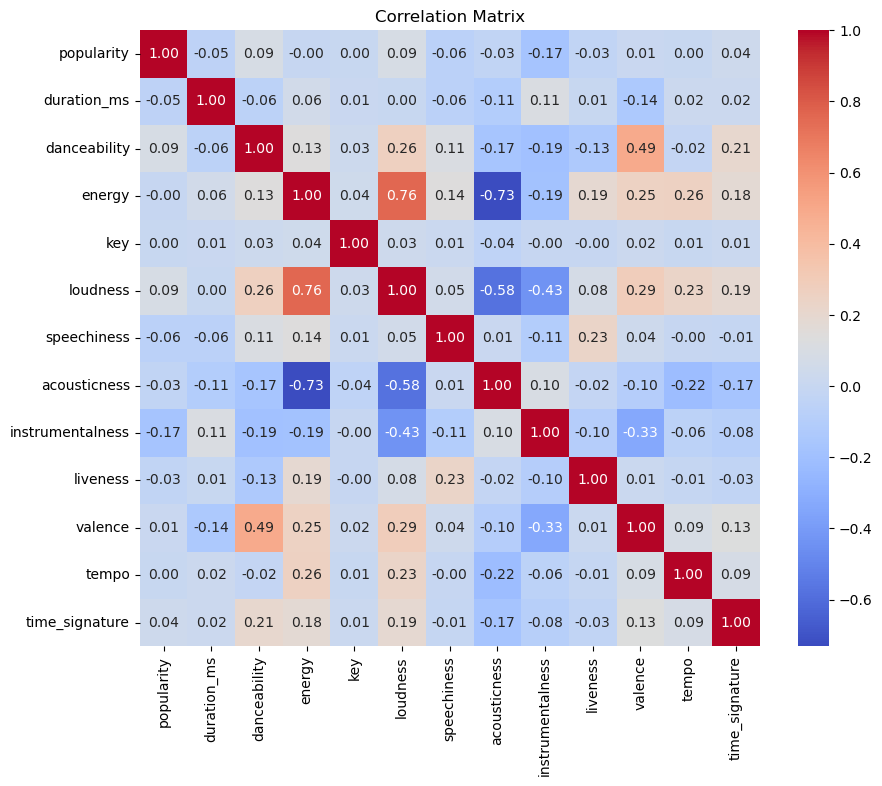

,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.053321,0.087245,-0.000871,0.004427,0.090162,-0.064913,-0.032143,-0.174509,-0.028974,0.011323,0.001891,0.038559
duration_ms,-0.053321,1.000000,-0.060165,0.058394,0.011665,0.002400,-0.063688,-0.106275,0.109759,0.005601,-0.140941,0.024062,0.021333
danceability,0.087245,-0.060165,1.000000,0.134654,0.032583,0.264934,0.108294,-0.167829,-0.191535,-0.132784,0.492132,-0.015470,0.206450
energy,-0.000871,0.058394,0.134654,1.000000,0.042777,0.761042,0.139823,-0.731108,-0.186446,0.190931,0.253953,0.260840,0.181097
key,0.004427,0.011665,0.032583,0.042777,1.000000,0.033895,0.013293,-0.041848,-0.003634,-0.002775,0.023814,0.005688,0.014993
loudness,0.090162,0.002400,0.264934,0.761042,0.033895,1.000000,0.054019,-0.582132,-0.434393,0.080270,0.289951,0.234033,0.193658
speechiness,-0.064913,-0.063688,0.108294,0.139823,0.013293,0.054019,1.000000,0.012316,-0.106998,0.231626,0.035074,-0.003208,-0.011022
acousticness,-0.032143,-0.106275,-0.167829,-0.731108,-0.041848,-0.582132,0.012316,1.000000,0.095258,-0.016355,-0.101706,-0.223598,-0.173610
instrumentalness,-0.174509,0.109759,-0.191535,-0.186446,-0.003634,-0.434393,-0.106998,0.095258,1.000000,-0.096614,-0.332375,-0.058944,-0.083336
liveness,-0.028974,0.005601,-0.132784,0.190931,-0.002775,0.080270,0.231626,-0.016355,-0.096614,1.000000,0.014425,-0.008841,-0.031845


In [522]:
attributes = [
    "popularity",
    "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    # "mode",   
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature",
]

corr_matrix = df_clean[attributes].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
corr_matrix

## Chi Square Test

We proceed to test the null hypothesis using the chi square test. That is, there is no association between `solo_or_collab` and `explicit`, and `track_genre`. 

In [523]:
for attribute in cat_attributes:
    contingency_table = pd.crosstab(df_clean[attribute], df_clean['solo_or_collab'])
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Attribute: {attribute}')
    print(f'Chi2: {chi2}')
    print(f'p-value: {p}')
    print(f'Degrees of Freedom: {dof}')
    # print(f'Expected: {expected}')
    print('-' * 50)
    

Attribute: explicit
Chi2: 109.06656646613803
p-value: 1.5692629657926915e-25
Degrees of Freedom: 1
--------------------------------------------------
Attribute: track_genre
Chi2: 15606.53560709135
p-value: 0.0
Degrees of Freedom: 112
--------------------------------------------------


We see that the p-value is less than 0.05 which means we reject the null hypothesis. Since we reject the null hypothesis, we can assume the alternative hypothesis is true. That is, there is an association between `solo_or_collab` and `explicit`, and `track_genre`.

## T-test (Independent Samples)

Next, we test the null hypothesis using the IND test. That is, there is no association between `solo_or_collab` and numerical attributes.

In [524]:
for attribute in num_attributes:
    t, p = stats.ttest_ind(df_solo[attribute], df_collab[attribute], equal_var=False)
    print(f'Attribute: {attribute} | t-statstic: {t} | p-value: {p}')
    print('-' * 80)


Attribute: popularity | t-statstic: -11.371040690986549 | p-value: 6.642656163729468e-30
--------------------------------------------------------------------------------
Attribute: duration_ms | t-statstic: -5.876407604174882 | p-value: 4.229506644948494e-09
--------------------------------------------------------------------------------
Attribute: danceability | t-statstic: -27.66898851321923 | p-value: 1.1274411742892881e-166
--------------------------------------------------------------------------------
Attribute: energy | t-statstic: 6.368139703155896 | p-value: 1.9367018341872174e-10
--------------------------------------------------------------------------------
Attribute: key | t-statstic: -3.0164051027282826 | p-value: 0.002559772030328211
--------------------------------------------------------------------------------
Attribute: loudness | t-statstic: -2.7326165034761885 | p-value: 0.006286715438487812
--------------------------------------------------------------------------

We see that all p-values except for the p-value of `acousticness` are less than 0.05 which means we reject the null hypothesis for those attributes. Matter of fact, the majority of the p-values are significantly smaller than 0.05. Since we reject the null hypothesis, we can assume the alternative hypothesis is true for all attribute excluding `acousticness`. That is, there is an association between `solo_or_collab` and all numerical attributes except `acousticness`.

## Conclusion